# Computation of $pp \rightarrow Z\rightarrow e^+ e^-$ cross section

Here we are going to compute the production cross section for $pp \rightarrow Z \rightarrow e^+ e^-$ using parton distribution functions from MSTW. This is a simple code that we have modified to use `swig`, but is no longer very actively maintained. 

This makes use of objects that are adapted from [ROOT](root.cern.ch), particularly their [Lorentz Vector class](https://root.cern.ch/doc/master/classTLorentzVector.html). 

This code computes the differential production cross section of pp -> Z -> e+e- using the [MSTW 2008 PDF set](https://mstwpdf.hepforge.org/code/code.html).
It also computes the total production cross section. This can be compared to the data collected by
the CMS experiment at 7 TeV [here](https://hepdata.net/record/ins921788). 

## Instructions to download MSTW PDF grids

- Download the [PDFs](https://mstwpdf.hepforge.org/code/mstw2008grids.tar.gz)
- Unpack:
```
tar -zxvf mstw2008grids.tar.gz
```


In [2]:
! wget https://mstwpdf.hepforge.org/code/mstw2008grids.tar.gz
! tar -xzf mstw2008grids.tar.gz

--2026-02-25 18:37:09--  https://mstwpdf.hepforge.org/code/mstw2008grids.tar.gz
Resolving mstwpdf.hepforge.org (mstwpdf.hepforge.org)... 129.234.186.186, 129.234.186.186
Connecting to mstwpdf.hepforge.org (mstwpdf.hepforge.org)|129.234.186.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘mstw2008grids.tar.gz.1’

mstw2008grids.tar.g     [               <=>  ]  24.03M  7.08MB/s    in 3.4s    

2026-02-25 18:37:13 (7.08 MB/s) - ‘mstw2008grids.tar.gz.1’ saved [25201615]



## Compile code

In [3]:
! swig -c++ -python swig/qft.i
! python swig/setup_qft.py build_ext --inplace

LorentzVector.cpp: In member function ‘std::string LorentzVector::PrintPtEtaPhiM() const’:
LorentzVector.cpp:26:19: warning: moving a temporary object prevents copy elision []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wpessimizing-move-Wpessimizing-move]8;;]
   26 |   return std::move(ss.str());
      |          ~~~~~~~~~^~~~~~~~~~
LorentzVector.cpp:26:19: note: remove ‘std::move’ call
LorentzVector.cpp: In member function ‘std::string LorentzVector::PrintPEtaPhiE() const’:
LorentzVector.cpp:32:19: warning: moving a temporary object prevents copy elision []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wpessimizing-move-Wpessimizing-move]8;;]
   32 |   return std::move(ss.str());
      |          ~~~~~~~~~^~~~~~~~~~
LorentzVector.cpp:32:19: note: remove ‘std::move’ call
LorentzVector.cpp: In member function ‘std::string LorentzVector::PrintXYZT() const’:
LorentzVector.cpp:38:19: warning: moving a temporary object prevents copy elision []

In [4]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [5]:
import qft
import numpy as np
import matplotlib.pyplot as plt

## Create incoming $e^+ e^-$.

In [6]:
# create incoming e+ and e-
em_i   = qft.Particle( qft.LorentzVector(0,0, 91.2*0.5,91.2*0.5),  11);
ep_i   = qft.Particle( qft.LorentzVector(0,0,-91.2*0.5,91.2*0.5), -11);

## Compute differential cross section of $e^+ e^- \rightarrow Z \rightarrow e^+ e^-$

Sigma =  8.057648990164674e-07


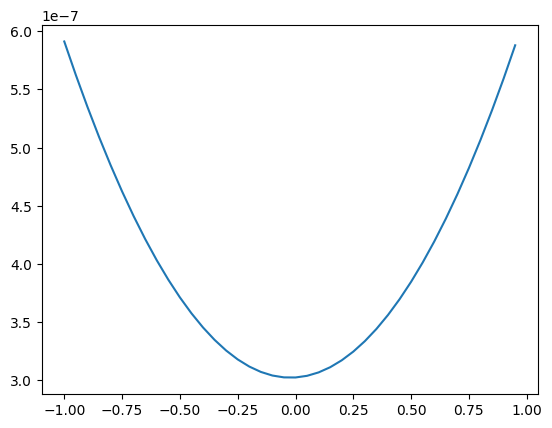

In [7]:
sigma = 0.
dcosTheta = 0.05
dsigma_domega = []
cosThetas = np.arange(-1,1,dcosTheta)
for cosTheta in cosThetas:
    # Produce e+e- --> Z --> e+e-
    ds_dO = qft.dSigmaDOmega( em_i, ep_i, 11, cosTheta )
    #print( "%6.2f %10.6e" % (cosTheta, ds_dO))
    # Integral = sum( dsigma/domega) * dcos(theta)
    sigma += ds_dO * dcosTheta;
    dsigma_domega.append(ds_dO)
print("Sigma = ", sigma)

plt.plot(cosThetas, dsigma_domega)
plt.show()

## Next set up the PDFs

In [8]:
# Get the PDF file
grid_file_name = "Grids/mstw2008lo.00.dat"
pdf = qft.c_mstwpdf(grid_file_name)

Reading PDF grid from Grids/mstw2008lo.00.dat


In [9]:
q = 100.
print("q = " , str(q) , ", ",  "alphaS(Q0) = " ,  str(pdf.alphaSQ0) , ", ", "alphaS(MZ) = " , str(pdf.alphaSMZ) , ", ",  "alphaSorder = " , str(pdf.alphaSorder) , ", ",  "alphaSnfmax = " , str(pdf.alphaSnfmax))

q =  100.0 ,  alphaS(Q0) =  0.68183 ,  alphaS(MZ) =  0.13939 ,  alphaSorder =  0 ,  alphaSnfmax =  5


## Your code goes here. 

Here is an example to access PDFs using the software. You will adjust the code below to adjust the above $e^+e^-$ initial state to use a proton-proton $pp$ initial state. 

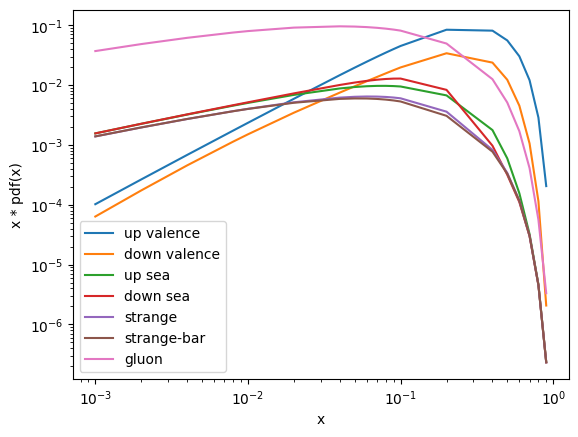

In [10]:
xvals = np.array([0.001, 0.002, 0.004, 0.008, 0.01, 0.02, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
pdfvals = []
labels = ['up valence', 'down valence', 'up sea', 'down sea', 'strange', 'strange-bar', 'gluon']
for x in xvals: 
    pdf.update(x,q)
    upv = x * pdf.cont.upv;
    dnv = x * pdf.cont.dnv;
    usea = x * pdf.cont.usea;
    dsea = x * pdf.cont.dsea;
    s = x * pdf.cont.str;
    sbar = x * pdf.cont.sbar;
    chm = x * pdf.cont.chm;
    cbar = x * pdf.cont.cbar;
    bot = x * pdf.cont.bot;
    bbar = x * pdf.cont.bbar;
    glu = x * pdf.cont.glu;
    phot = x * pdf.cont.phot;
    pdfvals.append([upv, dnv, usea, dsea, s, sbar, glu])
    #buf = "%8.4e %10.6e %10.6e %10.6e %10.6e %10.6e %10.6e %10.6e" % ( x, upv, dnv, usea, dsea, s, sbar, glu )
    #print(buf)
    
plotvals = np.array(pdfvals)
plt.plot(xvals,plotvals)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("x")
plt.ylabel("x * pdf(x)")
plt.legend(labels)
plt.show()